In [1]:
# Introduction to convolutional layer 
# inspecting the data directory
import os
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
    print(f" There are {len(dirnames)} directories and {len(filenames)} images in {dirpath} ")

 There are 2 directories and 1 images in pizza_steak 
 There are 2 directories and 0 images in pizza_steak/test 
 There are 0 directories and 250 images in pizza_steak/test/steak 
 There are 0 directories and 250 images in pizza_steak/test/pizza 
 There are 2 directories and 1 images in pizza_steak/train 
 There are 0 directories and 750 images in pizza_steak/train/steak 
 There are 0 directories and 750 images in pizza_steak/train/pizza 


In [4]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted(item.name for item in data_dir.glob("*")))
class_names = class_names[1:]
class_names

array(['pizza', 'steak'], dtype='<U9')

 this is ['819547.jpg']
Image shape: (512, 512, 3)


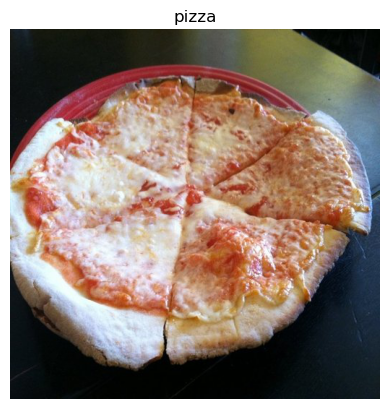

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    print(f" this is {random_image}")
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)  # Use plt.imshow instead of plt.show
    plt.title(target_class)
    plt.axis("off")
    print(f"Image shape: {img.shape}")
    plt.show()  # Call plt.show() after setting up the plot

    return img

# Example usage
img = view_random_image("pizza_steak/train/", "pizza")


In [23]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[22, 26, 27],
        [26, 30, 31],
        [29, 33, 36],
        ...,
        [ 1,  6,  2],
        [ 1,  6,  2],
        [ 1,  6,  2]],

       [[25, 29, 30],
        [25, 29, 30],
        [27, 31, 34],
        ...,
        [ 1,  6,  2],
        [ 1,  6,  2],
        [ 1,  6,  2]],

       [[26, 30, 31],
        [25, 29, 30],
        [24, 28, 31],
        ...,
        [ 1,  6,  2],
        [ 1,  6,  2],
        [ 2,  7,  3]],

       ...,

       [[ 7, 12, 16],
        [ 8, 13, 17],
        [ 8, 13, 17],
        ...,
        [18, 28, 30],
        [17, 27, 29],
        [17, 27, 29]],

       [[ 7, 12, 16],
        [ 8, 13, 17],
        [ 8, 13, 17],
        ...,
        [17, 27, 29],
        [16, 26, 28],
        [16, 26, 28]],

       [[ 7, 12, 16],
        [ 7, 12, 16],
        [ 8, 13, 17],
        ...,
        [16, 26, 28],
        [15, 25, 27],
        [15, 25, 27]]], dtype=uint8)>

In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"
train_data = train_datagen.flow_from_directory(directory =train_dir
                                              ,batch_size=32,
                                              target_size = (224,224),
                                              class_mode = "binary",
                                              seed = 42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode ="binary",
                                              seed =42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [30]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                   kernel_size =3,
                   activation="relu",
                   input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                             padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])
# fit the model 
history_1= model_1.fit(train_data,epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 18s 373ms/step - loss: 0.6066 - accuracy: 0.6640 - val_loss: 0.4159 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 17s 369ms/step - loss: 0.4279 - accuracy: 0.8100 - val_loss: 0.3750 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 17s 369ms/step - loss: 0.3996 - accuracy: 0.8253 - val_loss: 0.3276 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 17s 370ms/step - loss: 0.3569 - accuracy: 0.8460 - val_loss: 0.4237 - val_accuracy: 0.8100
Epoch 5/5
47/47 [==============================] - 17s 371ms/step - loss: 0.3338 - accuracy: 0.8707 - val_loss: 0.3085 - val_accuracy: 0.8720


In [29]:
len(train_data)
1500/32

46.875

In [31]:
# set random set
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_2.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
history_2 = model_2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                         validation_data=valid_data,
                       validation_steps=(len(valid_data)))

Epoch 1/5
47/47 [==============================] - 5s 95ms/step - loss: 0.9126 - accuracy: 0.4953 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 4s 84ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 4s 84ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 4s 85ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 4s 84ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [35]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_3.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),
                    metrics=["accuracy"])
history_3=model_3.fit(train_data,
           epochs=5,
           steps_per_epoch=len(train_data),
           validation_data=valid_data,
           validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 114ms/step - loss: 3.5250 - accuracy: 0.6247 - val_loss: 0.5954 - val_accuracy: 0.6900
Epoch 2/5
47/47 [==============================] - 5s 107ms/step - loss: 0.7284 - accuracy: 0.6987 - val_loss: 0.6639 - val_accuracy: 0.6500
Epoch 3/5
47/47 [==============================] - 5s 106ms/step - loss: 0.5872 - accuracy: 0.7393 - val_loss: 1.3046 - val_accuracy: 0.5280
Epoch 4/5
47/47 [==============================] - 5s 107ms/step - loss: 0.8912 - accuracy: 0.6933 - val_loss: 0.6365 - val_accuracy: 0.7200
Epoch 5/5
47/47 [==============================] - 5s 107ms/step - loss: 0.4545 - accuracy: 0.7913 - val_loss: 0.4495 - val_accuracy: 0.7900


In [36]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_13 (Dense)            (None, 100)               15052900  
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dense_15 (Dense)            (None, 100)               10100     
                                                                 
 dense_16 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
#Preprocess the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator as ig
train_datagen = ig(rescale = 1/255.)
test_datagen = ig(rescale=1/255.)
train_data = train_datagen.flow_from_directory(directory=train_dir,# Target directory of imgage
                                              target_size=(224,224),# Target size of image(height,width)
                                              class_mode="binary",# type of data your working with
                                              batch_size=32)# size of image per batch
test_data = test_datagen.flow_from_directory(test_dir,target_size=(224,224),
                                            class_mode="binary",
                                            batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [40]:
image,labels = train_data.next()# get the next batch of images/labels 
len(image),len(labels)

(32, 32)

In [41]:
# Create model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [42]:
model_4 = Sequential([
    Conv2D(filters=10,kernel_size=3,strides=1,padding="valid",
                activation="relu",
              input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [43]:
model_4.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])
history_4 = model_4.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 21s 442ms/step - loss: 0.5582 - accuracy: 0.7233 - val_loss: 0.3923 - val_accuracy: 0.8280
Epoch 2/5
47/47 [==============================] - 21s 440ms/step - loss: 0.3648 - accuracy: 0.8473 - val_loss: 0.3478 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 21s 441ms/step - loss: 0.2584 - accuracy: 0.9047 - val_loss: 0.4074 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 21s 440ms/step - loss: 0.1174 - accuracy: 0.9653 - val_loss: 0.3462 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 21s 439ms/step - loss: 0.0541 - accuracy: 0.9873 - val_loss: 0.4381 - val_accuracy: 0.8500


<Axes: >

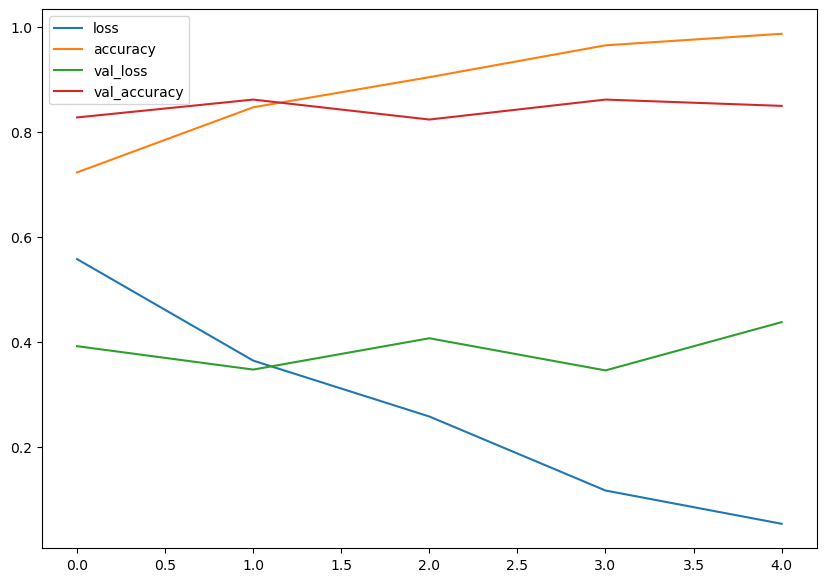

In [44]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [47]:
def plot_loss_curves(history):
    loss=history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    epochs = range(len(history.history["loss"]))
    plt.plot(epochs,loss,label="training_loss")
    plt.plot(epochs,val_loss,label="val_LOSS")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    #plot the accuracy
    plt.figure()
    plt.plot(epochs,accuracy,label="training_accuracy")
    plt.plot(epochs,val_accuracy,label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

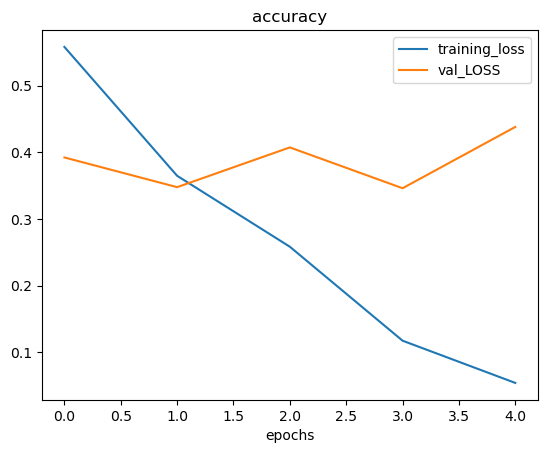

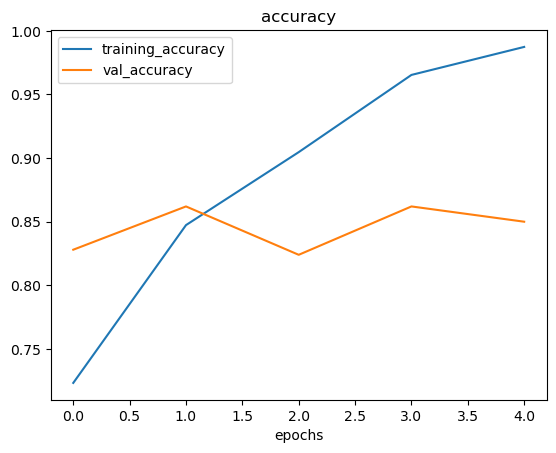

In [48]:
plot_loss_curves(history_4)

In [50]:
# Another model
model_5 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [51]:
model_5.compile(loss="binary_crossentropy",
               optimizer = Adam(),
               metrics=["accuracy"])
history_5 = model_5.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 176ms/step - loss: 0.6025 - accuracy: 0.6627 - val_loss: 0.4174 - val_accuracy: 0.8360
Epoch 2/5
47/47 [==============================] - 8s 172ms/step - loss: 0.4453 - accuracy: 0.7940 - val_loss: 0.3848 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 8s 173ms/step - loss: 0.4096 - accuracy: 0.8180 - val_loss: 0.3684 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 8s 173ms/step - loss: 0.3969 - accuracy: 0.8307 - val_loss: 0.3602 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 8s 172ms/step - loss: 0.3916 - accuracy: 0.8387 - val_loss: 0.3828 - val_accuracy: 0.8220


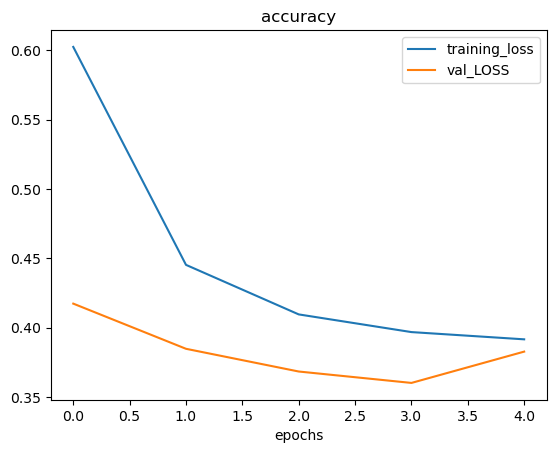

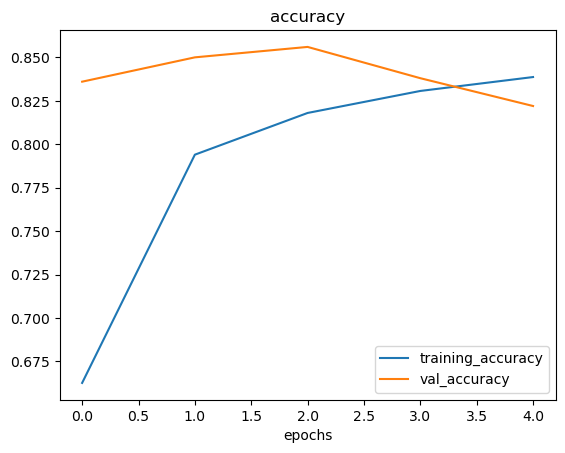

In [52]:
plot_loss_curves(history_5)

In [72]:
# Train Data Gen
train_datagen_augmented = ig(rescale=1/255.,
                            rotation_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            width_shift_range=0.2,
                            height_shift_range=0.3,
                            horizontal_flip=True)
train_datagen = ig(rescale=1/255.)
test_datagen = ig(rescale=1/255.)

In [73]:
train_data_augemented = train_datagen_augmented.flow_from_directory(train_dir,target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)
train_data = train_datagen.flow_from_directory(train_dir,target_size=(224,224),
                                              batch_size=32,
                                              class_mode="binary",
                                              shuffle=False)
IMG_SIZE =(224,224)
test_data = test_datagen.flow_from_directory(test_dir,target_size=IMG_SIZE,
                                            batch_size=32,
                                            class_mode = "binary",
                                            shuffle=False)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [74]:
images,labels = train_data.next()
augmented_images,augmented_labels = train_data_augemented.next()

showing image number 14


(-0.5, 223.5, 223.5, -0.5)

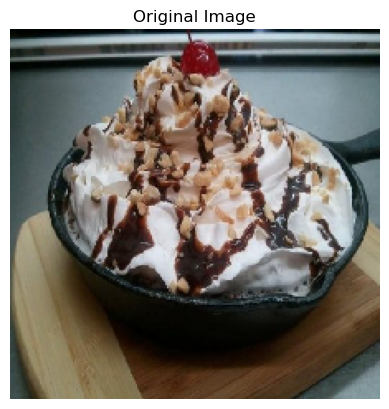

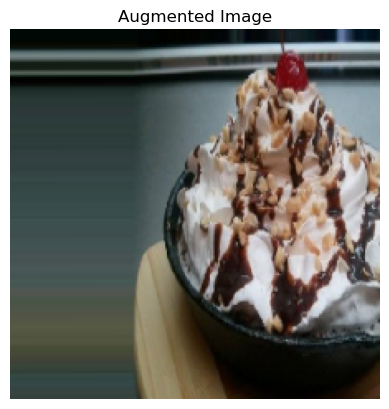

In [75]:
import random
random_number  = random.randint(0,32)
print(f"showing image number {random_number }")

plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")
plt.axis(False)

In [77]:
# Creating a model with augmented data
model_6 = Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])
model_6.compile(loss="binary_crossentropy",optimizer=Adam(),
                    metrics=["accuracy"])
history_6 = model_6.fit(train_data_augemented,epochs=5,
                          steps_per_epoch=len(train_data_augemented),
                           validation_data=test_data,
                             validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 278ms/step - loss: 0.7244 - accuracy: 0.4387 - val_loss: 0.6820 - val_accuracy: 0.5200
Epoch 2/5
47/47 [==============================] - 13s 277ms/step - loss: 0.6924 - accuracy: 0.5573 - val_loss: 0.6761 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 13s 279ms/step - loss: 0.6918 - accuracy: 0.5120 - val_loss: 0.6754 - val_accuracy: 0.6500
Epoch 4/5
47/47 [==============================] - 13s 279ms/step - loss: 0.6780 - accuracy: 0.5927 - val_loss: 0.6364 - val_accuracy: 0.7000
Epoch 5/5
47/47 [==============================] - 13s 282ms/step - loss: 0.6591 - accuracy: 0.6287 - val_loss: 0.6227 - val_accuracy: 0.6140


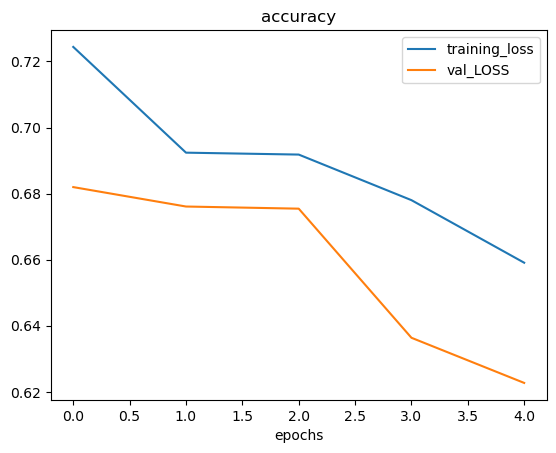

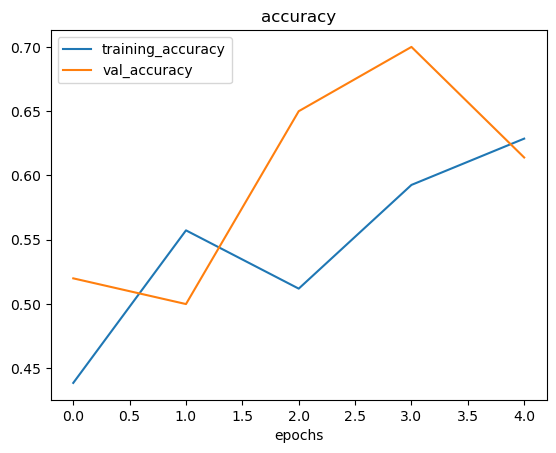

In [78]:
plot_loss_curves(history_6)

In [79]:
# Let's shuffle our augmented trainning data
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                           target_size=(224,224),
                                                                           class_mode = "binary",
                                                                           batch_size=32,
                                                                           shuffle=True)

Found 1500 images belonging to 2 classes.


In [80]:
model_7 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
    
])


In [81]:
model_7.compile(loss="binary_crossentropy",optimizer=Adam(),
                   metrics=["accuracy"])
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                       steps_per_epoch=len(train_data_augemented),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 14s 274ms/step - loss: 0.6611 - accuracy: 0.5887 - val_loss: 0.5678 - val_accuracy: 0.7000
Epoch 2/5
47/47 [==============================] - 13s 268ms/step - loss: 0.5546 - accuracy: 0.7093 - val_loss: 0.4092 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 13s 270ms/step - loss: 0.5030 - accuracy: 0.7567 - val_loss: 0.3727 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 13s 271ms/step - loss: 0.5183 - accuracy: 0.7447 - val_loss: 0.4029 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 13s 269ms/step - loss: 0.5100 - accuracy: 0.7513 - val_loss: 0.3688 - val_accuracy: 0.8320


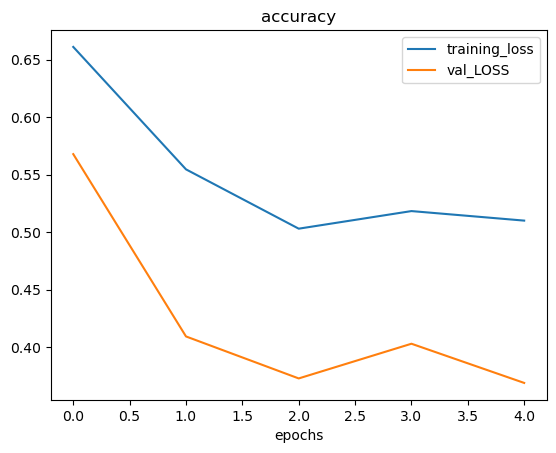

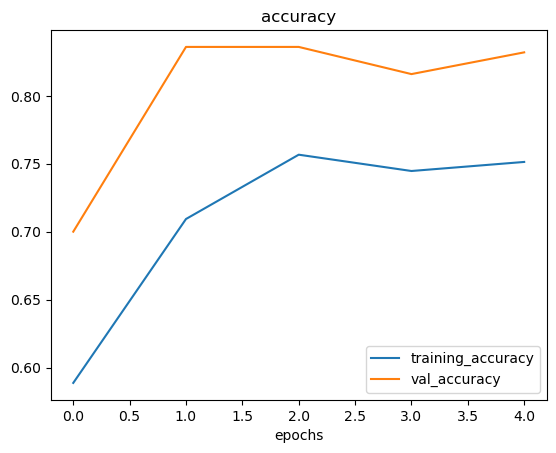

In [82]:
plot_loss_curves(history_7)

(-0.5, 205.5, 154.5, -0.5)

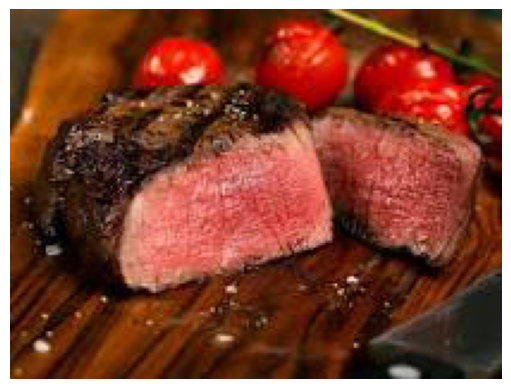

In [83]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
steak = mpimg.imread("steak01.jpeg")
plt.imshow(steak)
plt.axis(False)

In [84]:
steak.shape

(155, 206, 3)

In [91]:
def load_and_prep_image(filename,img_shape=224):
    
    img = tf.io.read_file(filename)
    
    img = tf.image.decode_image(img)
    img = tf.image.resize(img,size = [img_shape,img_shape])
   
    
    
    img = img/255.
    return img
    

In [92]:
steak = load_and_prep_image("steak01.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.37254903, 0.2784314 , 0.1764706 ],
        [0.37254903, 0.2784314 , 0.1764706 ],
        [0.37254903, 0.27216387, 0.16706933],
        ...,
        [0.10197838, 0.2       , 0.1537466 ],
        [0.11764706, 0.2       , 0.17254902],
        [0.11764706, 0.2       , 0.17254902]],

       [[0.3704394 , 0.27632177, 0.174361  ],
        [0.36858413, 0.27446648, 0.17250568],
        [0.36832985, 0.27131626, 0.16790752],
        ...,
        [0.10197838, 0.19156162, 0.14403678],
        [0.11764706, 0.19156162, 0.15778187],
        [0.11764706, 0.19156162, 0.15778187]],

       [[0.36502102, 0.27270657, 0.17254902],
        [0.36157215, 0.27005064, 0.16751428],
        [0.36109945, 0.2696866 , 0.16682424],
        ...,
        [0.10522255, 0.18070728, 0.12848394],
        [0.11945028, 0.18070728, 0.13788515],
        [0.11945028, 0.18070728, 0.13788515]],

       ...,

       [[0.37984884, 0.16384757, 0.        ],
        [0.42

In [96]:
pred = model_7.predict(tf.expand_dims(steak,axis=0))

1/1 [==============================] - 0s 16ms/step


In [97]:
class_names

array(['pizza', 'steak'], dtype='<U9')

In [99]:
pred_class = class_names[int(tf.round(pred))]
print(f"Predicted Class : {pred_class}")

Predicted Class : steak


In [102]:
def pred_and_plot(model,filename,class_names=class_names):
    img = load_and_prep_image(filename)
    pred = model_7.predict(tf.expand_dims(img,axis=0)) 
    pred_class = class_names[int(tf.round(pred))]
    plt.imshow(img)
    plt.title(f"Prediction : {pred_class}")
    plt.axis(False)
    

1/1 [==============================] - 0s 72ms/step


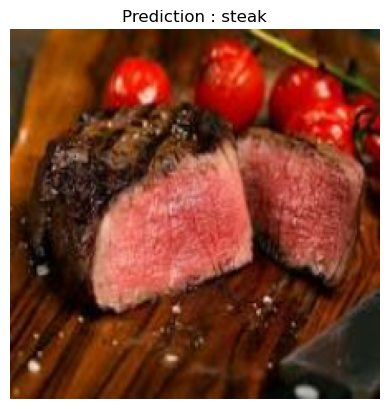

In [103]:
pred_and_plot(model_7,"steak01.jpeg")